In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
import itertools

In [2]:
max_length = 0
corpus = list()
labels = list()

with open(Path('./output/benign/all_benign.txt'), 'r') as f:
  lines = f.read().split('\n')[:-1]
  # print(lines[0][33:])
for line in lines:
  doc = line[33:]
  corpus.append(doc)
  labels.append(0)
  

In [3]:
with open(Path('./output/malware/all_malware.txt'), 'r') as f:
  lines = f.read().split('\n')[:-1]
  # print(lines[0][33:])
for line in lines:
  doc = line[33:]
  corpus.append(doc)
  labels.append(1)

In [5]:
len(corpus)

2800

In [6]:
len(labels)

2800

In [4]:
labels = np.array(labels)

In [5]:
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)
X = pad_sequences(X, maxlen=320000)
print(X.shape)

(2800, 320000)


In [6]:
X = X.reshape(-1, 64, 5000)
print(X.shape)

(2800, 64, 5000)


In [19]:
vocab_size = len(tokenizer.word_index) + 1
print(f'노드 개수: {vocab_size}, 한 개 밖에 없는 노드:', end=' ')
unique_word = 0
for k in tokenizer.word_docs:
  if tokenizer.word_docs[k] == 1:
    unique_word += 1
print(unique_word)

노드 개수: 26, 한 개 밖에 없는 노드: 0


In [20]:
print(tokenizer.word_docs)

defaultdict(<class 'int'>, {'sub': 2796, 'add': 2799, 'shl': 2343, 'jz': 2770, 'call': 2786, 'mov': 2800, 'xchg': 1063, 'imul': 2438, 'jnb': 2490, 'xor': 2798, 'nop': 1470, 'push': 2789, 'cmp': 2785, 'jmp': 2785, 'movzx': 2368, 'lea': 2752, 'pop': 2790, 'retn': 2779, 'shr': 2477, 'or': 2729, 'dec': 2499, 'inc': 2587, 'rol': 911, 'retf': 492, 'ror': 611})


In [7]:
model = Sequential()
model.add(Bidirectional(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1, return_sequences=True),
                        input_shape=(64, 5000)))
model.add(Bidirectional(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 64, 128)           2593280   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,692,225
Trainable params: 2,692,225
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42)
print(f'Train을 {X_train.shape}만큼, Test를 {X_test.shape}만큼 진행')

Train을 (2520, 64, 5000)만큼, Test를 (280, 64, 5000)만큼 진행


In [12]:
# !pip install tensorflow-addons

  Using cached tensorflow_addons-0.17.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


In [13]:
import tensorflow_addons as tfa
import tqdm

tqdm_callback = tfa.callbacks.TQDMProgressBar()

batch_size = 512
mc = ModelCheckpoint('./log/LSTM_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size,
                    verbose=0, validation_data=(X_test, y_test), callbacks=[mc, tqdm_callback])


/home/c4nd0it/anaconda3/envs/keras_env/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/5           ETA: ?s - 

Epoch 2/100


0/5           ETA: ?s - 

Epoch 3/100


0/5           ETA: ?s - 

Epoch 4/100


0/5           ETA: ?s - 

Epoch 5/100


0/5           ETA: ?s - 

Epoch 6/100


0/5           ETA: ?s - 

Epoch 7/100


0/5           ETA: ?s - 

Epoch 8/100


0/5           ETA: ?s - 

Epoch 9/100


0/5           ETA: ?s - 

Epoch 10/100


0/5           ETA: ?s - 

Epoch 11/100


0/5           ETA: ?s - 

Epoch 12/100


0/5           ETA: ?s - 

Epoch 13/100


0/5           ETA: ?s - 

Epoch 14/100


0/5           ETA: ?s - 

Epoch 15/100


0/5           ETA: ?s - 

Epoch 16/100


0/5           ETA: ?s - 

Epoch 17/100


0/5           ETA: ?s - 

Epoch 18/100


0/5           ETA: ?s - 

Epoch 19/100


0/5           ETA: ?s - 

Epoch 20/100


0/5           ETA: ?s - 

Epoch 21/100


0/5           ETA: ?s - 

Epoch 22/100


0/5           ETA: ?s - 

Epoch 23/100


0/5           ETA: ?s - 

Epoch 24/100


0/5           ETA: ?s - 

Epoch 25/100


0/5           ETA: ?s - 

Epoch 26/100


0/5           ETA: ?s - 

Epoch 27/100


0/5           ETA: ?s - 

Epoch 28/100


0/5           ETA: ?s - 

Epoch 29/100


0/5           ETA: ?s - 

Epoch 30/100


0/5           ETA: ?s - 

Epoch 31/100


0/5           ETA: ?s - 

Epoch 32/100


0/5           ETA: ?s - 

Epoch 33/100


0/5           ETA: ?s - 

Epoch 34/100


0/5           ETA: ?s - 

Epoch 35/100


0/5           ETA: ?s - 

Epoch 36/100


0/5           ETA: ?s - 

Epoch 37/100


0/5           ETA: ?s - 

Epoch 38/100


0/5           ETA: ?s - 

Epoch 39/100


0/5           ETA: ?s - 

Epoch 40/100


0/5           ETA: ?s - 

Epoch 41/100


0/5           ETA: ?s - 

Epoch 42/100


0/5           ETA: ?s - 

Epoch 43/100


0/5           ETA: ?s - 

Epoch 44/100


0/5           ETA: ?s - 

Epoch 45/100


0/5           ETA: ?s - 

Epoch 46/100


0/5           ETA: ?s - 

Epoch 47/100


0/5           ETA: ?s - 

Epoch 48/100


0/5           ETA: ?s - 

Epoch 49/100


0/5           ETA: ?s - 

Epoch 50/100


0/5           ETA: ?s - 

Epoch 51/100


0/5           ETA: ?s - 

Epoch 52/100


0/5           ETA: ?s - 

Epoch 53/100


0/5           ETA: ?s - 

Epoch 54/100


0/5           ETA: ?s - 

Epoch 55/100


0/5           ETA: ?s - 

Epoch 56/100


0/5           ETA: ?s - 

Epoch 57/100


0/5           ETA: ?s - 

Epoch 58/100


0/5           ETA: ?s - 

Epoch 59/100


0/5           ETA: ?s - 

Epoch 60/100


0/5           ETA: ?s - 

Epoch 61/100


0/5           ETA: ?s - 

Epoch 62/100


0/5           ETA: ?s - 

Epoch 63/100


0/5           ETA: ?s - 

Epoch 64/100


0/5           ETA: ?s - 

Epoch 65/100


0/5           ETA: ?s - 

Epoch 66/100


0/5           ETA: ?s - 

Epoch 67/100


0/5           ETA: ?s - 

Epoch 68/100


0/5           ETA: ?s - 

Epoch 69/100


0/5           ETA: ?s - 

Epoch 70/100


0/5           ETA: ?s - 

Epoch 71/100


0/5           ETA: ?s - 

Epoch 72/100


0/5           ETA: ?s - 

Epoch 73/100


0/5           ETA: ?s - 

Epoch 74/100


0/5           ETA: ?s - 

Epoch 75/100


0/5           ETA: ?s - 

Epoch 76/100


0/5           ETA: ?s - 

Epoch 77/100


0/5           ETA: ?s - 

Epoch 78/100


0/5           ETA: ?s - 

Epoch 79/100


0/5           ETA: ?s - 

Epoch 80/100


0/5           ETA: ?s - 

Epoch 81/100


0/5           ETA: ?s - 

Epoch 82/100


0/5           ETA: ?s - 

Epoch 83/100


0/5           ETA: ?s - 

Epoch 84/100


0/5           ETA: ?s - 

Epoch 85/100


0/5           ETA: ?s - 

Epoch 86/100


0/5           ETA: ?s - 

Epoch 87/100


0/5           ETA: ?s - 

Epoch 88/100


0/5           ETA: ?s - 

Epoch 89/100


0/5           ETA: ?s - 

Epoch 90/100


0/5           ETA: ?s - 

Epoch 91/100


0/5           ETA: ?s - 

Epoch 92/100


0/5           ETA: ?s - 

Epoch 93/100


0/5           ETA: ?s - 

Epoch 94/100


0/5           ETA: ?s - 

Epoch 95/100


0/5           ETA: ?s - 

Epoch 96/100


0/5           ETA: ?s - 

Epoch 97/100


0/5           ETA: ?s - 

Epoch 98/100


0/5           ETA: ?s - 

Epoch 99/100


0/5           ETA: ?s - 

Epoch 100/100


0/5           ETA: ?s - 

In [14]:
model.load_weights('./log/LSTM_model.h5')

In [15]:
y_pred = model.predict(X_test, verbose=1, batch_size=batch_size)
y_pred = [y >= 0.5 for y in y_pred]

print(metrics.classification_report(y_test, y_pred, digits=4))
with open('log/report.txt', 'w') as f:
  f.write(str(metrics.classification_report(y_test, y_pred, digits=4)))


1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

           0     0.7709    0.9262    0.8415       149
           1     0.8911    0.6870    0.7759       131

    accuracy                         0.8143       280
   macro avg     0.8310    0.8066    0.8087       280
weighted avg     0.8272    0.8143    0.8108       280



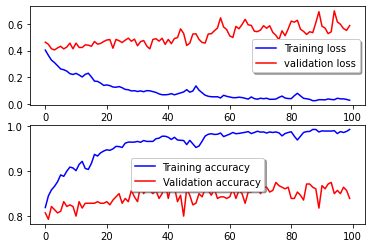

In [16]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r',
           label="validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'],
           color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

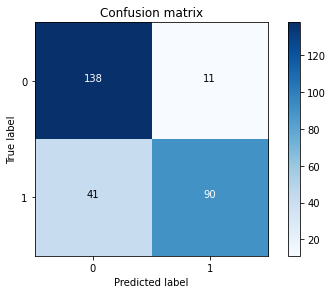

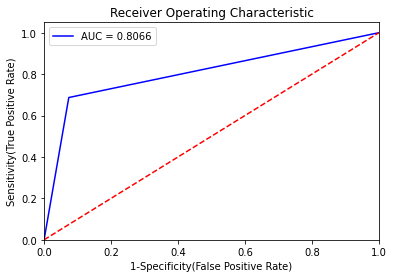

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.get_cmap('Blues')):

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), classes=[0, 1])
plt.savefig('log/confusion_matrix.png')

# Drawing ROC curve
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.4f' % (auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.savefig('log/roc.png')